In [1]:
from keras.datasets import imdb

#### Subset the data into Train and Test

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=1000)

17465344/17464789 [==============================] - 5s 0us/step


In [4]:
import numpy as np

#### Prepare the Data

In [7]:
def vectorize_sequences(sequences, dimensions=1000):
    results   = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

In [8]:
y_train  = np.asarray(train_labels).astype('float32')
y_test   = np.asarray(test_labels).astype('float32')

#### Developing the Model

In [17]:
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(1000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation="sigmoid"))

In [18]:
model.compile(optimizer = "rmsprop",
             loss='binary_crossentropy',
             metrics = ['accuracy'])

In [11]:
from keras import optimizers

In [19]:
model.compile(optimizer = optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics = ['accuracy'])

In [20]:
x_val   = x_train[:1000]
partial_x_train = x_train[1000:]

y_val   = y_train[:1000]
partial_y_train = y_train[1000:]

In [21]:
history  = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size = 512,
                    validation_data = (x_val,y_val))

Epoch 1/20
47/47 [==============================] - 1s 20ms/step - loss: 0.5372 - accuracy: 0.7503 - val_loss: 0.4080 - val_accuracy: 0.8250
Epoch 2/20
47/47 [==============================] - 1s 13ms/step - loss: 0.3722 - accuracy: 0.8457 - val_loss: 0.3537 - val_accuracy: 0.8510
Epoch 3/20
47/47 [==============================] - 1s 12ms/step - loss: 0.3306 - accuracy: 0.8639 - val_loss: 0.3227 - val_accuracy: 0.8590
Epoch 4/20
47/47 [==============================] - 1s 12ms/step - loss: 0.3174 - accuracy: 0.8676 - val_loss: 0.3194 - val_accuracy: 0.8660
Epoch 5/20
47/47 [==============================] - 1s 13ms/step - loss: 0.3117 - accuracy: 0.8712 - val_loss: 0.3155 - val_accuracy: 0.8620
Epoch 6/20
47/47 [==============================] - 1s 13ms/step - loss: 0.3059 - accuracy: 0.8726 - val_loss: 0.3167 - val_accuracy: 0.8640
Epoch 7/20
47/47 [==============================] - 1s 12ms/step - loss: 0.3036 - accuracy: 0.8734 - val_loss: 0.3150 - val_accuracy: 0.8650
Epoch 8/20
47

In [28]:
import matplotlib.pyplot as plt

In [32]:
history_dict  = history.history
loss_values   = history_dict['loss']

val_loss_values = history_dict['val_loss']

epochs          = range(1, 21)

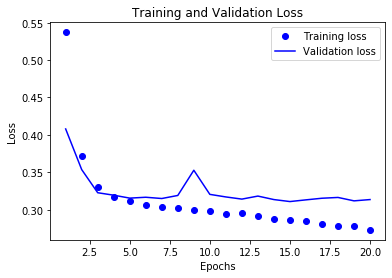

In [35]:
plt.plot(epochs, loss_values, "bo", label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

#### Check model fit

In [36]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.3321 - accuracy: 0.8584
